# Analytics

#### Date: 2021/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2021/02
##### Professor: Hilmer Neri

##### Members:

- Gabriel Alves Hussein 17/0103200
- Rafael Ribeiro de Oliveira 15/0045182
- Nícalo Ribeiro Dourado Araújo 16/0016169
- Murilo Loiola Dantas 17/0163571
- Maciel Ferreira Custódio Júnior 19/0100087
- Guilherme Aguera de la Fuente Vilela 19/0088168
- Carlos Eduardo Miranda Roriz 19/0011424
- Davi Lima da Silva 19/0026588
- Karla Chaiane da Silva Feliciano 20/0021541
- Endy Sally Soares Andrade 18/0113194

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os
from scipy.spatial import distance
from scipy.stats import mannwhitneyu
import tensorly as ts

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format = 'retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Repos

In [4]:
repos = ['2021-2-SiGeD-Users',
         '2021-2-SiGeD-Clients',
         '2021-2-SiGeD-Demands',
         '2021-2-SiGeD-Sectors',
         '2021-2-SiGeD-Cargos',
         '2021-2-SiGeD-Frontend']
language = [['2021-2-SiGeD-Users', 'js'],
            ['2021-2-SiGeD-Clients', 'js'],
            ['2021-2-SiGeD-Demands', 'js'],
            ['2021-2-SiGeD-Sectors', 'js'],
            ['2021-2-SiGeD-Cargos', 'js'],
            ['2021-2-SiGeD-Frontend', 'js']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

##### Path to the folder with all your jsons

In [5]:
jsons = glob('../analytics-raw-data/*.json') # add your path here

In [6]:
jsons

['../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Clients-03-18-2022-22:54:01-v3.0.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06:44:32-v2.1.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06:44:01-v2.1.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Demands-03-19-2022-01:35:42-v3.0.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Frontend-03-16-2022-02:14:37-v2.4.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:27:05-v1.0.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Frontend-04-04-2022-18:31:04-v3.3.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Frontend-03-16-2022-06:45:08-v2.7.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Demands-03-16-2022-02:16:40-v2.4.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Frontend-03-16-2022-01:29:24-v2.2.0.json',
 '../analytics-raw-data/fga-eps-mds_2021-2-SiGeD-Frontend-03-16-2022-03:04:59-v2.6.0.js

In [7]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"SiGeD-(.*?)-(\d+-\d+-\d+)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2] + "-" + aux_df[3]
    
    df['date'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])

    return df

#### Create base component dataframe

In [8]:
base_component_df = create_base_component_df(jsons)

/tmp/ipykernel_36240/3212703231.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_36240/3212703231.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_36240/3212703231.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_36240/3212703231.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
/tmp/ipykernel_36240/3212703231.py:22: FutureWarning: The frame.append method is deprecated 

In [9]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version,date
45,duplicated_lines_density,0.0,True,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
46,functions,14,NaN,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
47,security_rating,1.0,True,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
48,files,6,NaN,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
49,complexity,21,NaN,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
50,ncloc,150,NaN,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
51,coverage,86.2,False,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
52,reliability_rating,1.0,True,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
53,comment_lines_density,1.3,False,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,03-18-2022-21:27:05-v1.0.0,03-18-2022
18,duplicated_lines_density,0.0,True,fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06...,Clients,03-16-2022-06:44:01-v2.1.0,03-16-2022


#### Create dataframe per file

In [10]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [11]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)

        file_repository = file_name[12:-32]
        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list,
                                                                file_component_data,
                                                                language_extension = file_language)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"SiGeD-(.*?)-(\d+-\d+-\d+)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = pd.to_datetime(aux_df[2], format = '%m-%d-%Y')

    df = df.sort_values(by=['repository', 'version'])

    return df

In [12]:
file_component_df = create_file_df(jsons)

/tmp/ipykernel_36240/1322340743.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_36240/1322340743.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_36240/1322340743.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_36240/1322340743.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
/tmp/ipykernel_36240/1322340743.py:65: FutureWarning: The frame.append method is deprecated 

In [13]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,test,filename,repository,version
229,src/Utils/functionsJWT.js,2,4,0.0,0.0,0.0,16,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
230,src/index.js,3,3,0.0,0.0,94.4,28,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
231,src/Models/RoleSchema.js,0,0,0.0,0.0,100.0,20,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
232,src/Controllers/RolesController.js,8,11,3.1,0.0,91.9,62,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
233,src/routes.js,0,0,0.0,0.0,100.0,10,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
234,src/Utils/validate.js,1,3,0.0,0.0,71.4,14,1.0,NaN,100.0,1.555,1.0,1.0,fga-eps-mds_2021-2-SiGeD-Cargos-03-18-2022-21:...,Cargos,2022-03-18
14,src/Services/Axios/baseService.js,0,0,0.0,0.0,100.0,8,1.0,NaN,100.0,2.563,1.0,2.0,fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06...,Clients,2022-03-16
15,src/Controllers/ClientController.js,10,22,0.4,0.0,71.9,230,5.0,NaN,100.0,2.563,1.0,2.0,fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06...,Clients,2022-03-16
16,src/Models/ClientSchema.js,0,0,0.0,0.0,100.0,84,1.0,NaN,100.0,2.563,1.0,2.0,fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06...,Clients,2022-03-16
17,src/Controllers/FeatureController.js,6,8,0.0,0.0,100.0,66,5.0,NaN,100.0,2.563,1.0,2.0,fga-eps-mds_2021-2-SiGeD-Clients-03-16-2022-06...,Clients,2022-03-16


#### Create dataframe per repository

In [14]:
# Create dataframe per repository

repository_dataframes = {}
file_component_df['repository'] = "2021-2-SiGeD-" + file_component_df['repository']

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()

dict_keys(['2021-2-SiGeD-Users', '2021-2-SiGeD-Clients', '2021-2-SiGeD-Demands', '2021-2-SiGeD-Sectors', '2021-2-SiGeD-Cargos', '2021-2-SiGeD-Frontend'])

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [15]:
# Defining measure em1 calculation, where em1 = density of non-complex file
def m1(df):
    m0 = np.median(df['complexity'].astype(float)/df['functions'].astype(float))
    m1 = df['complexity'].astype(float)
    m2 = df['functions'].astype(float)
    m3 = len(df) # total files

    #  intervals for em1 thresholds
    x = np.array([0, m0])
    y = np.array([1, 0])

    # Defining intervals for em1 interpretation(numeric interpolation). It indicates quality score
    IF1 = np.interp(list(((m1/m2) <= m0)[(m2 > 0)]),x, y)

    em1 = sum(IF1)/m3

    return em1

def em1(df):

    em1 = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return em1

##### COMMENTS

In [16]:
def m2(df):

    # Defining metrics for measure em2, where em2 = density of commented files
    m3 = len(df) # total files
    m4 = df['comment_lines_density'].astype(float)

    #  intervals for em1 thresholds
    x = np.array([0.1, 0.3])
    y = np.array([1, 0])

    # Defining intervals for em2 interpretation(numeric interpolation). It indicates quality score
    em2i = []
    for if2i in m4:
        if 10 <= if2i <= 30:
            em2i.append(np.interp(if2i/100,x, y))
        else:
            em2i.append(0)

    m2 = np.sum(em2i)/m3

    return em2

def em2(df):

    em2 = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return em2

##### DUPLICATIONS

In [17]:
def em3(df):

    # Defining metrics for measure em3,where ma3 = absence of duplication on file (density)
    m3 = len(df) # total files
    m5 = df['duplicated_lines_density'].astype(float)

    #  intervals for em1 thresholds
    x = np.array([0, 0.05])
    y = np.array([1, 0])

    # Intervals for ma3 interpretation
    em3i = []
    for if3i in m5:
        if  if3i < 5:
            em3i.append(np.interp(if3i/100,x, y))
        else:
            em3i.append(0)

    em3 = np.sum(em3i)/m3

    return em3

### Calculate m1, m2 and m3 for each repository

In [18]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
        
    em1_list = []
    em2_list = []
    em3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()
    
    for version in version_vec:
        version_df = df[df['version'] == version]

        em1_list.append(em1(version_df))
        em2_list.append(em2(version_df))
        em3_list.append(em3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'em1': em1_list,
                               'em2': em2_list,
                               'em3': em3_list,
                               'repository': repository_list,
                               'version': version_list})
    
    return metrics_df

In [19]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [20]:
repository_dataframes["2021-2-SiGeD-Frontend"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,test,filename,repository,version
1286,src/App.js,1,1,0.0,0.0,0.0,11,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1287,src/Services/Axios/baseService/baseService.js,8,18,0.0,0.0,0.0,80,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1288,src/Constants/baseUrl.js,0,0,0.0,0.0,0.0,5,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1289,src/Routes/ChangePassRoutes.js,1,1,0.0,0.0,0.0,11,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1290,src/Services/Axios/clientServices.js,18,62,0.0,0.0,0.0,320,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1291,src/Constants/colors.js,0,0,0.0,0.0,0.0,9,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1292,scripts/consts.js,0,0,0.0,0.0,0.0,9,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1293,src/Services/Axios/demandsServices.js,24,85,0.4,0.0,0.0,452,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1294,src/Components/SectorDropdown/dropdownStyle.js,3,4,0.0,0.0,0.0,24,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15
1295,src/Utils/functions.js,2,2,0.0,0.0,0.0,7,1.0,NaN,100.0,0,1.0,0.0,fga-eps-mds_2021-2-SiGeD-Frontend-03-15-2022-2...,2021-2-SiGeD-Frontend,2022-03-15


In [21]:
repository_metrics["2021-2-SiGeD-Users"]

,em1,em2,em3,repository,version
0,0.625,0.0,1.0,2021-2-SiGeD-Users,2022-03-18


In [22]:
repository_metrics["2021-2-SiGeD-Clients"]

,em1,em2,em3,repository,version
0,0.642857,0.0,1.0,2021-2-SiGeD-Clients,2022-03-16
1,0.642857,0.0,1.0,2021-2-SiGeD-Clients,2022-03-18


In [23]:
repository_metrics["2021-2-SiGeD-Demands"]

,em1,em2,em3,repository,version
0,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-03
1,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-16
2,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-19
3,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-30
4,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-04-04


In [24]:
repository_metrics["2021-2-SiGeD-Sectors"]

,em1,em2,em3,repository,version
0,0.666667,0.0,1.0,2021-2-SiGeD-Sectors,2022-03-18


In [25]:
repository_metrics["2021-2-SiGeD-Cargos"]

,em1,em2,em3,repository,version
0,0.666667,0.0,1.0,2021-2-SiGeD-Cargos,2022-03-18


In [26]:
repository_metrics["2021-2-SiGeD-Frontend"]

,em1,em2,em3,repository,version
0,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-15
1,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-16
2,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-19
3,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-30
4,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-04-04


In [27]:
repos_metrics_list = []

repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Users"])
repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Clients"])
repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Demands"])
repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Sectors"])
repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Cargos"])
repos_metrics_list.append(repository_metrics["2021-2-SiGeD-Frontend"])

#Printing frontend_metrics
#frontend_metrics

repos_metrics_list[5]

,em1,em2,em3,repository,version
0,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-15
1,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-16
2,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-19
3,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-30
4,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-04-04


### Data visualization

- You must do this for each of your repositories

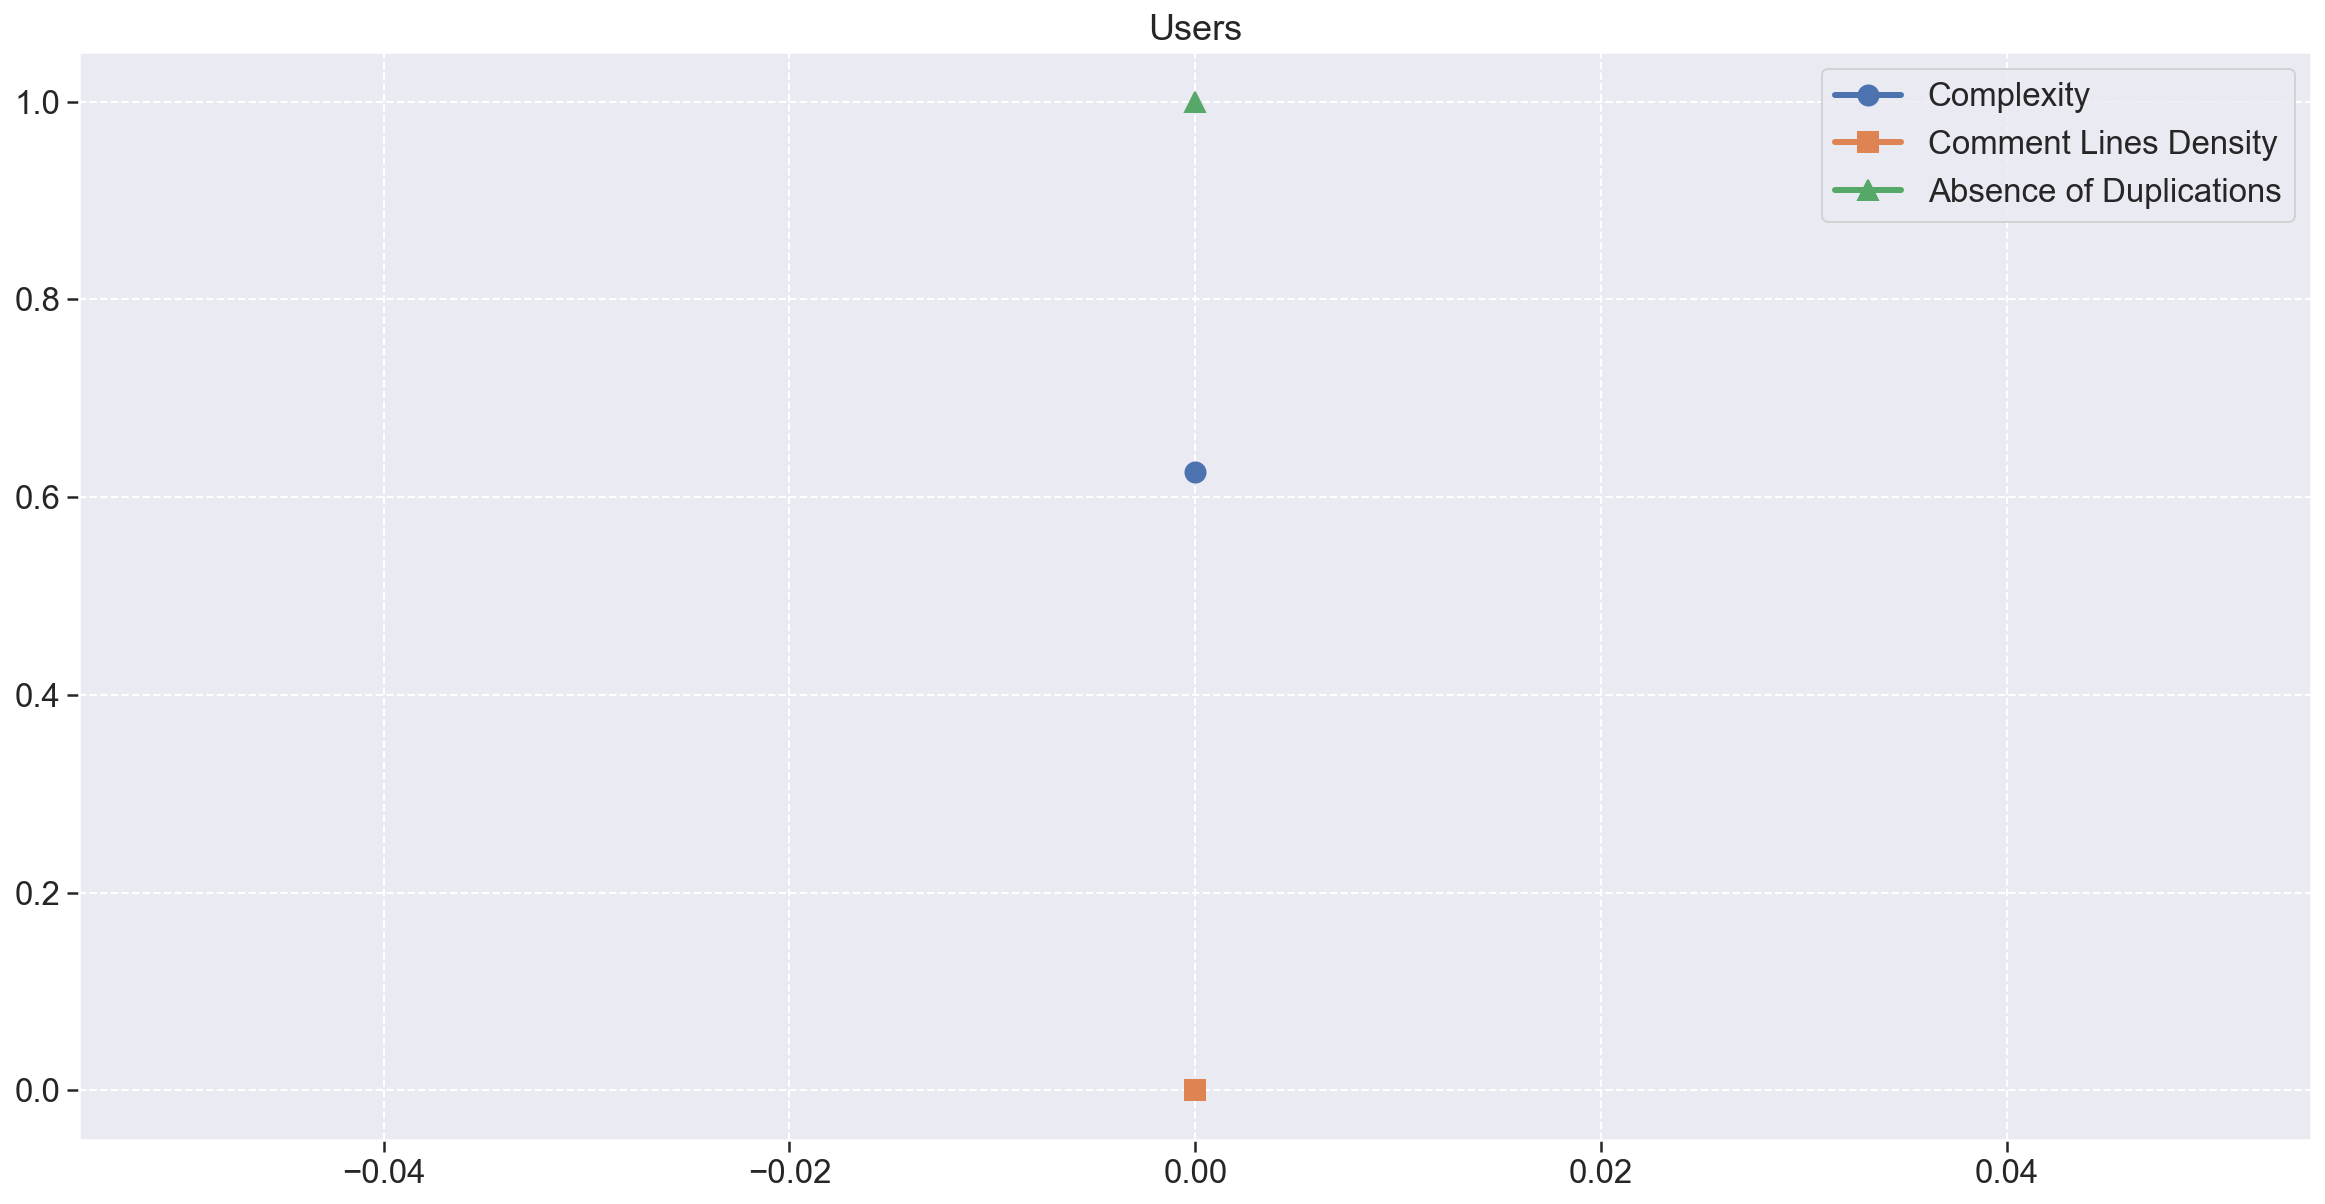

In [28]:
fig = plt.figure(figsize=(20, 10))

plt.title('Users')
plt.plot(repos_metrics_list[0]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[0]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[0]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

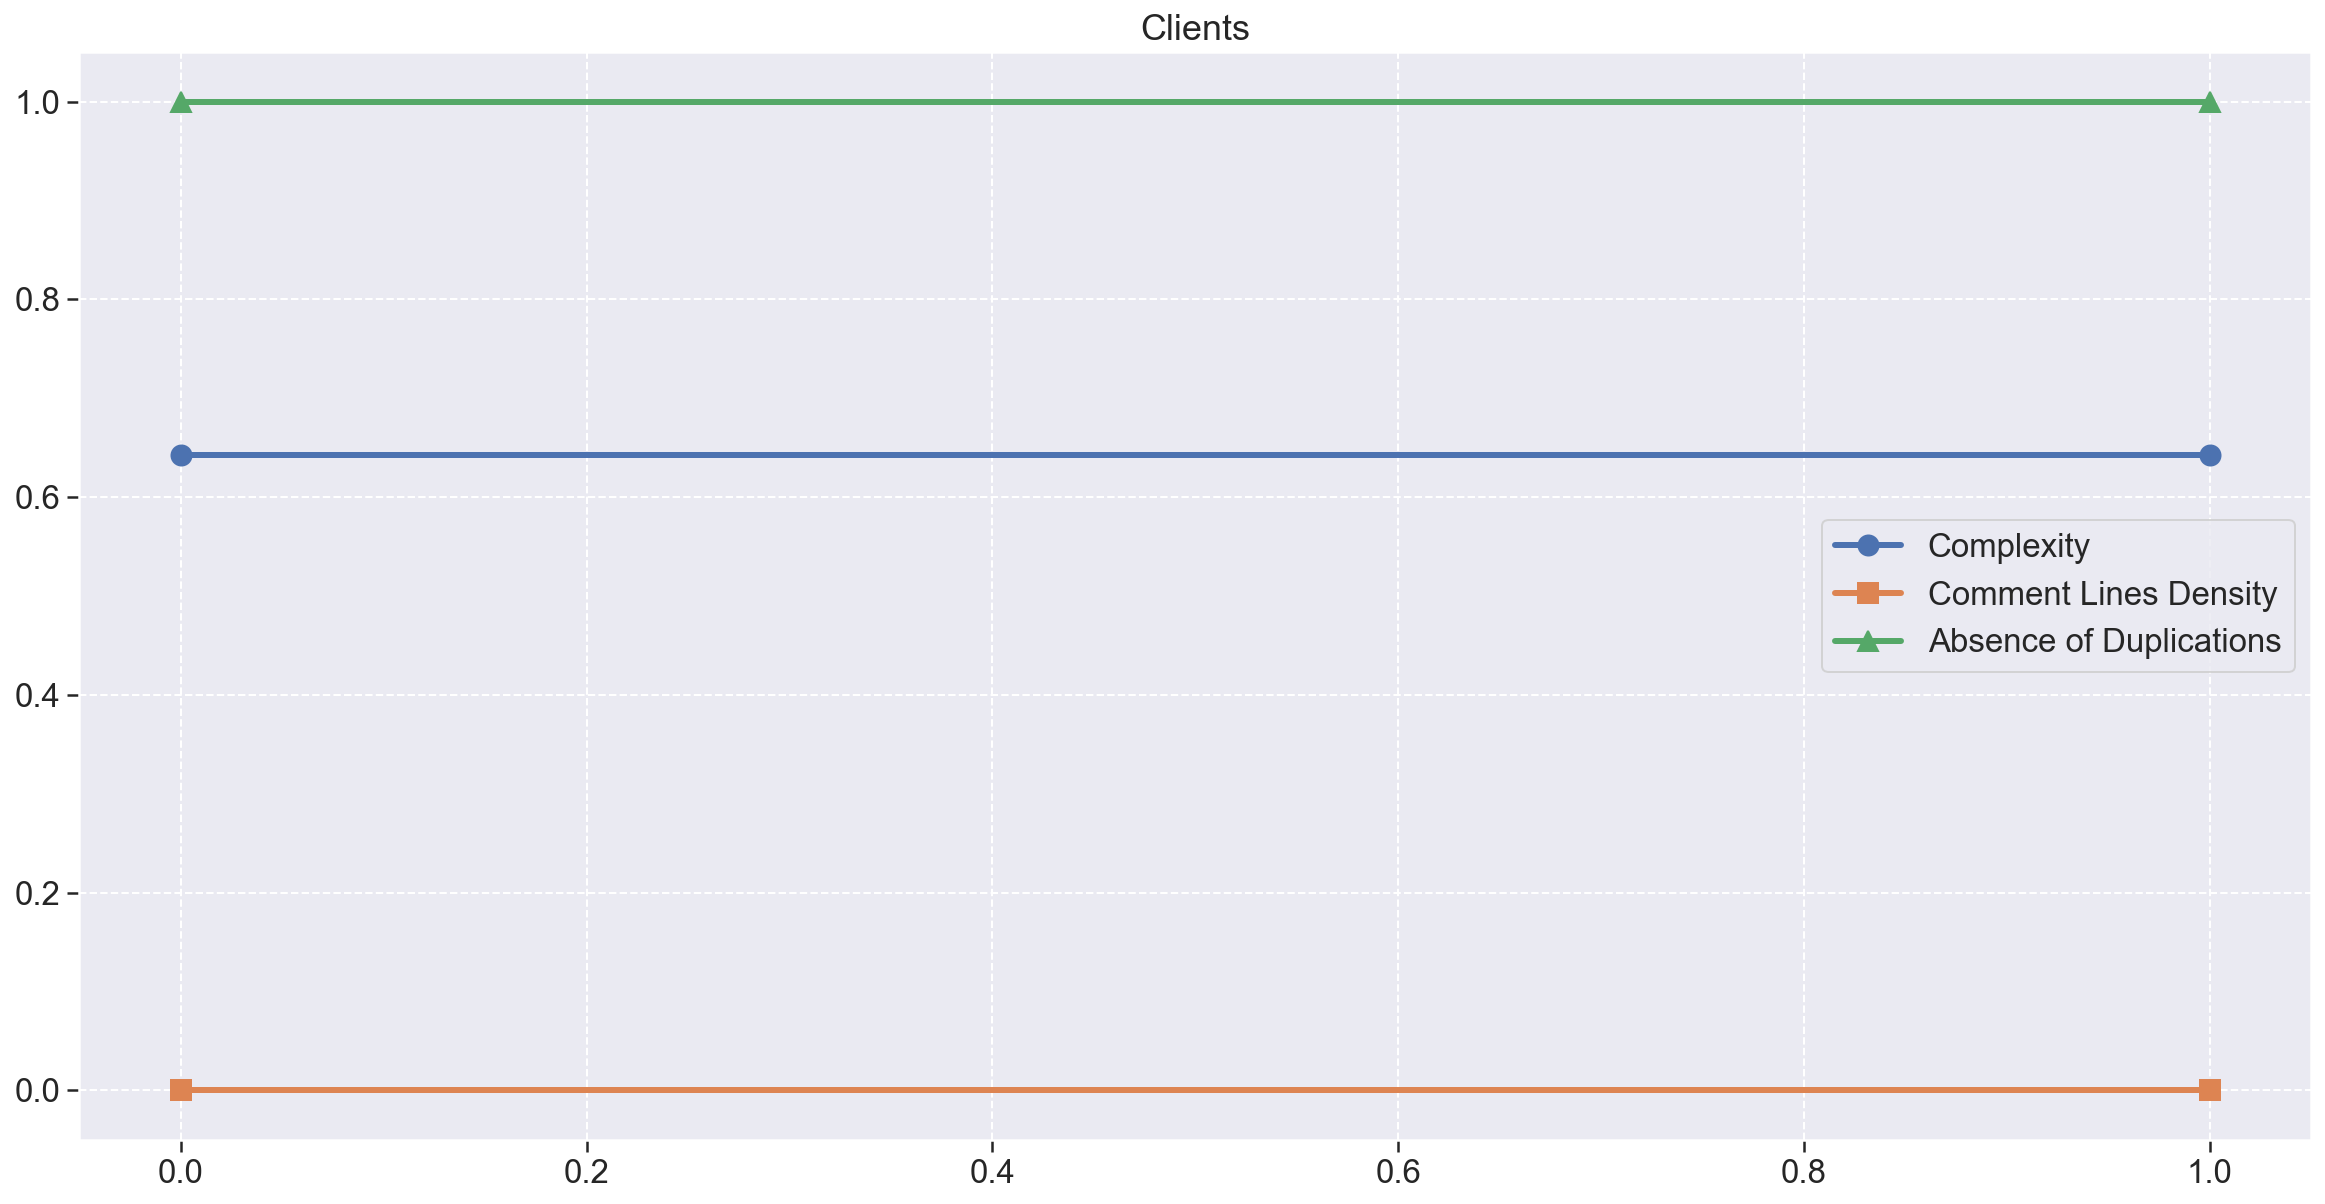

In [29]:
fig = plt.figure(figsize=(20, 10))

plt.title('Clients')
plt.plot(repos_metrics_list[1]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[1]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[1]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

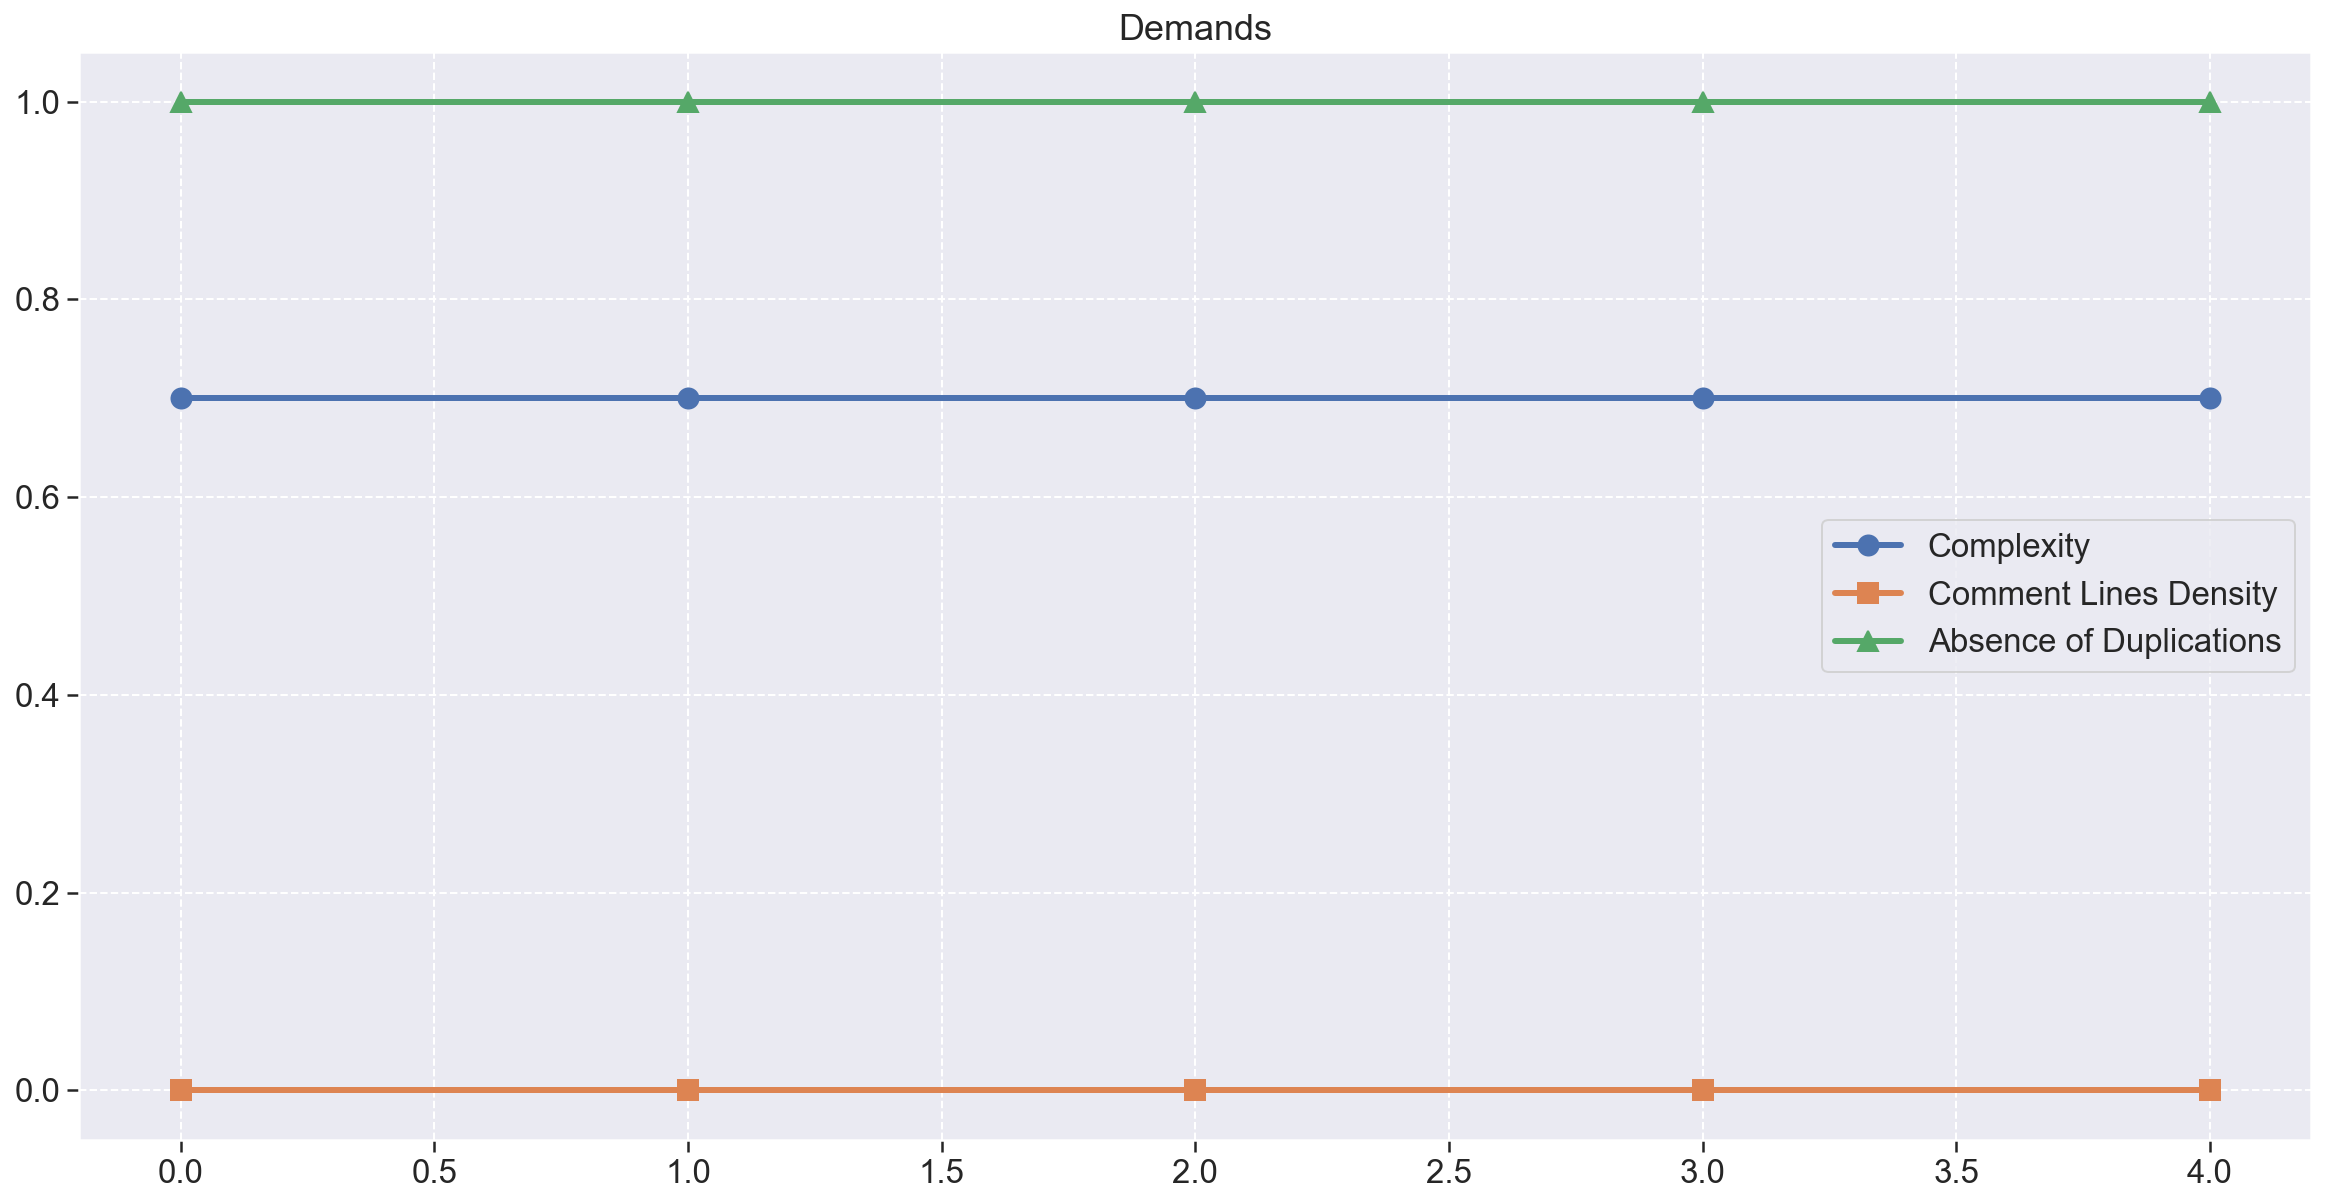

In [30]:
fig = plt.figure(figsize=(20, 10))

plt.title('Demands')
plt.plot(repos_metrics_list[2]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[2]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[2]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

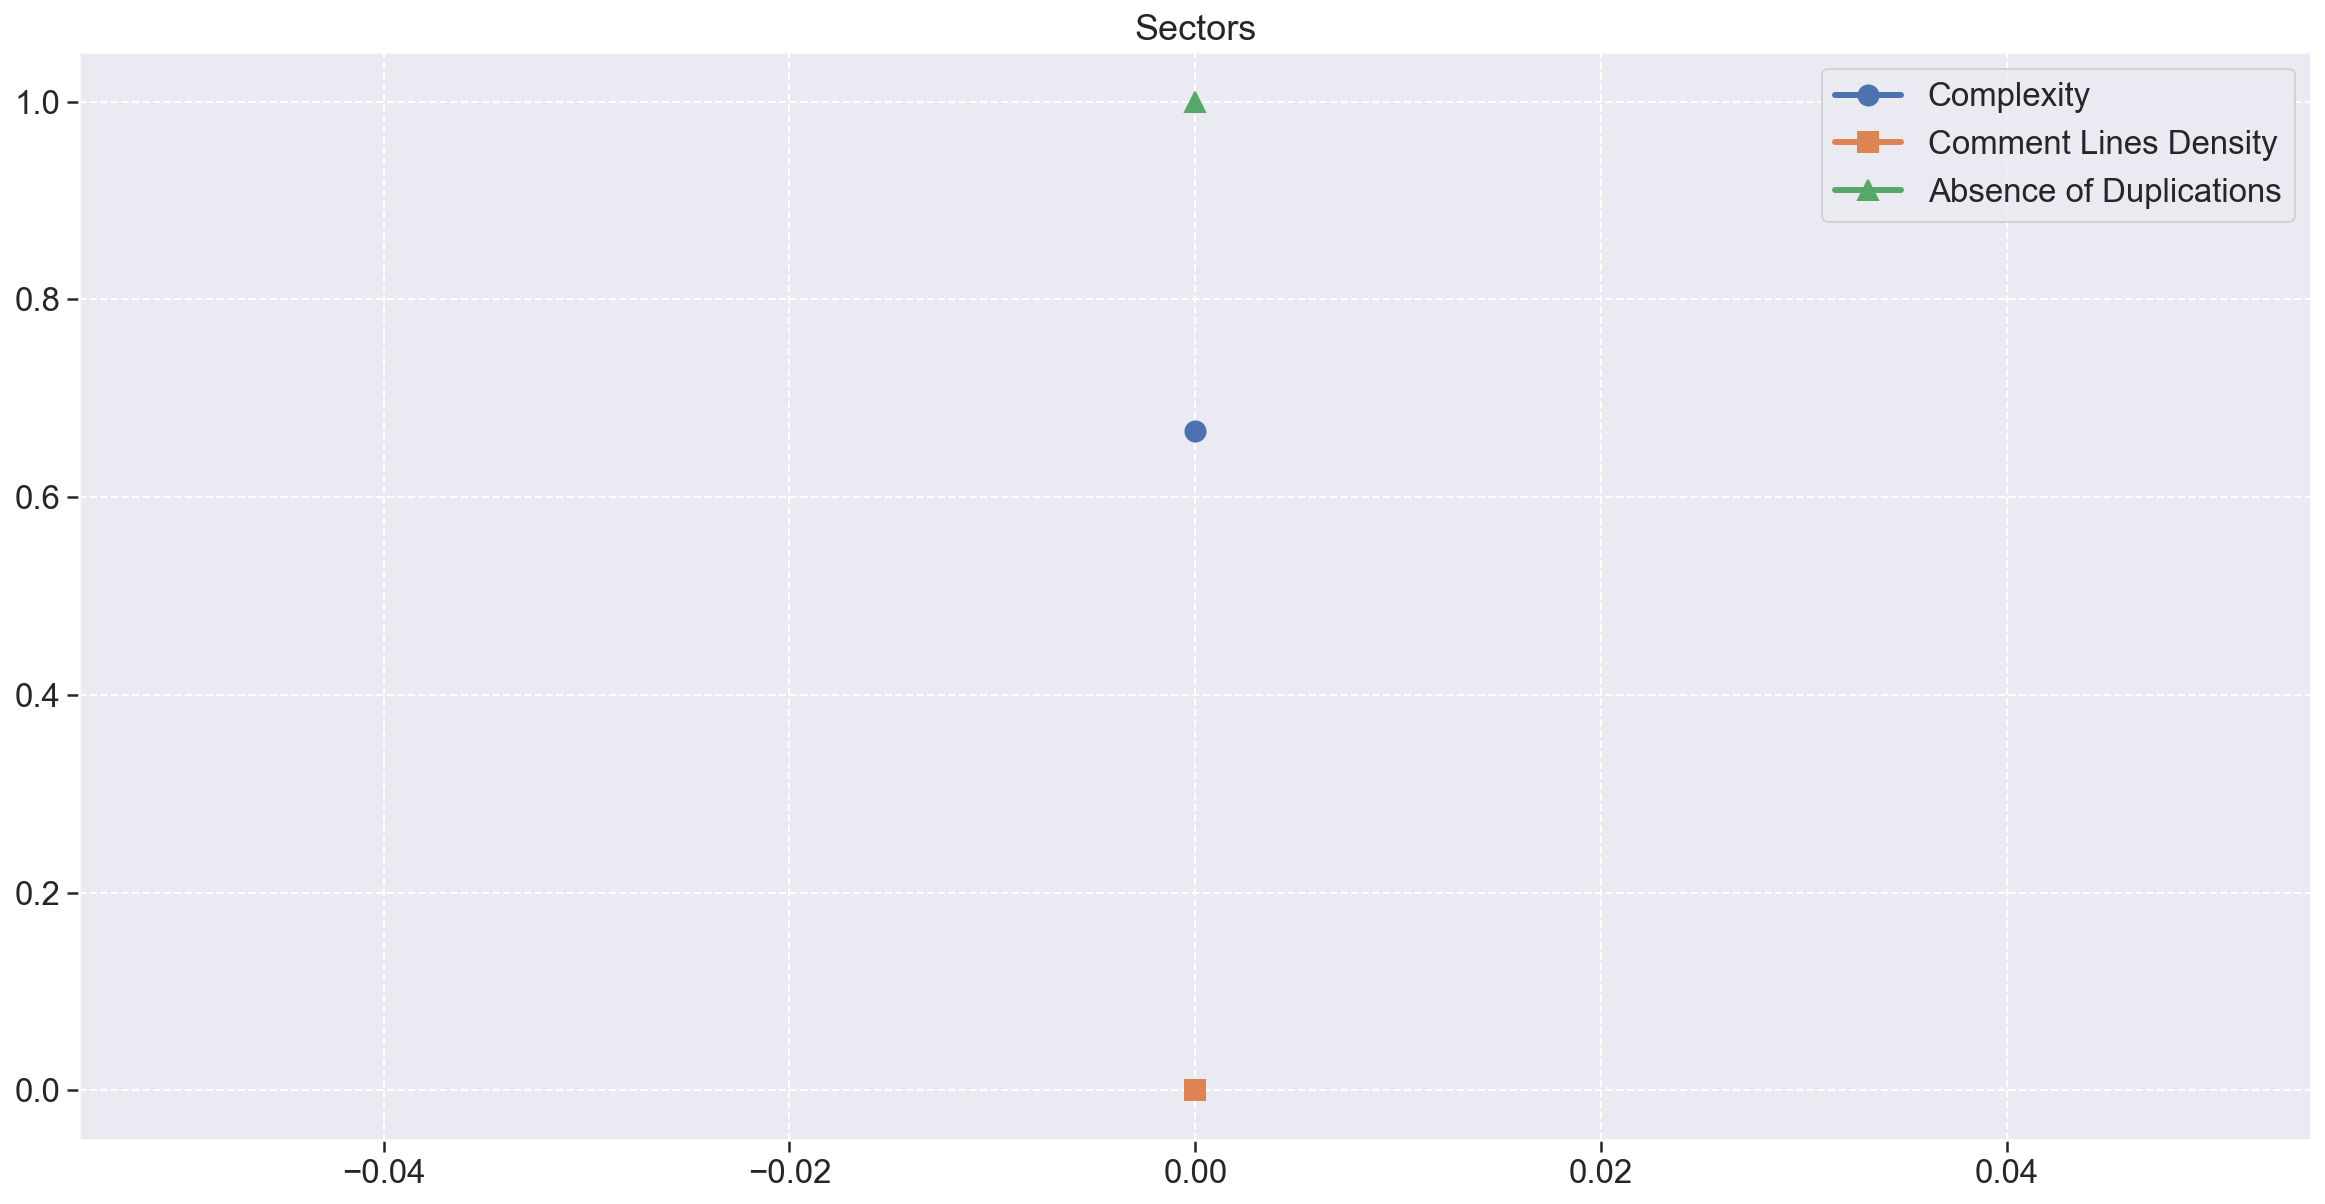

In [31]:
fig = plt.figure(figsize=(20, 10))

plt.title('Sectors')
plt.plot(repos_metrics_list[3]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[3]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[3]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

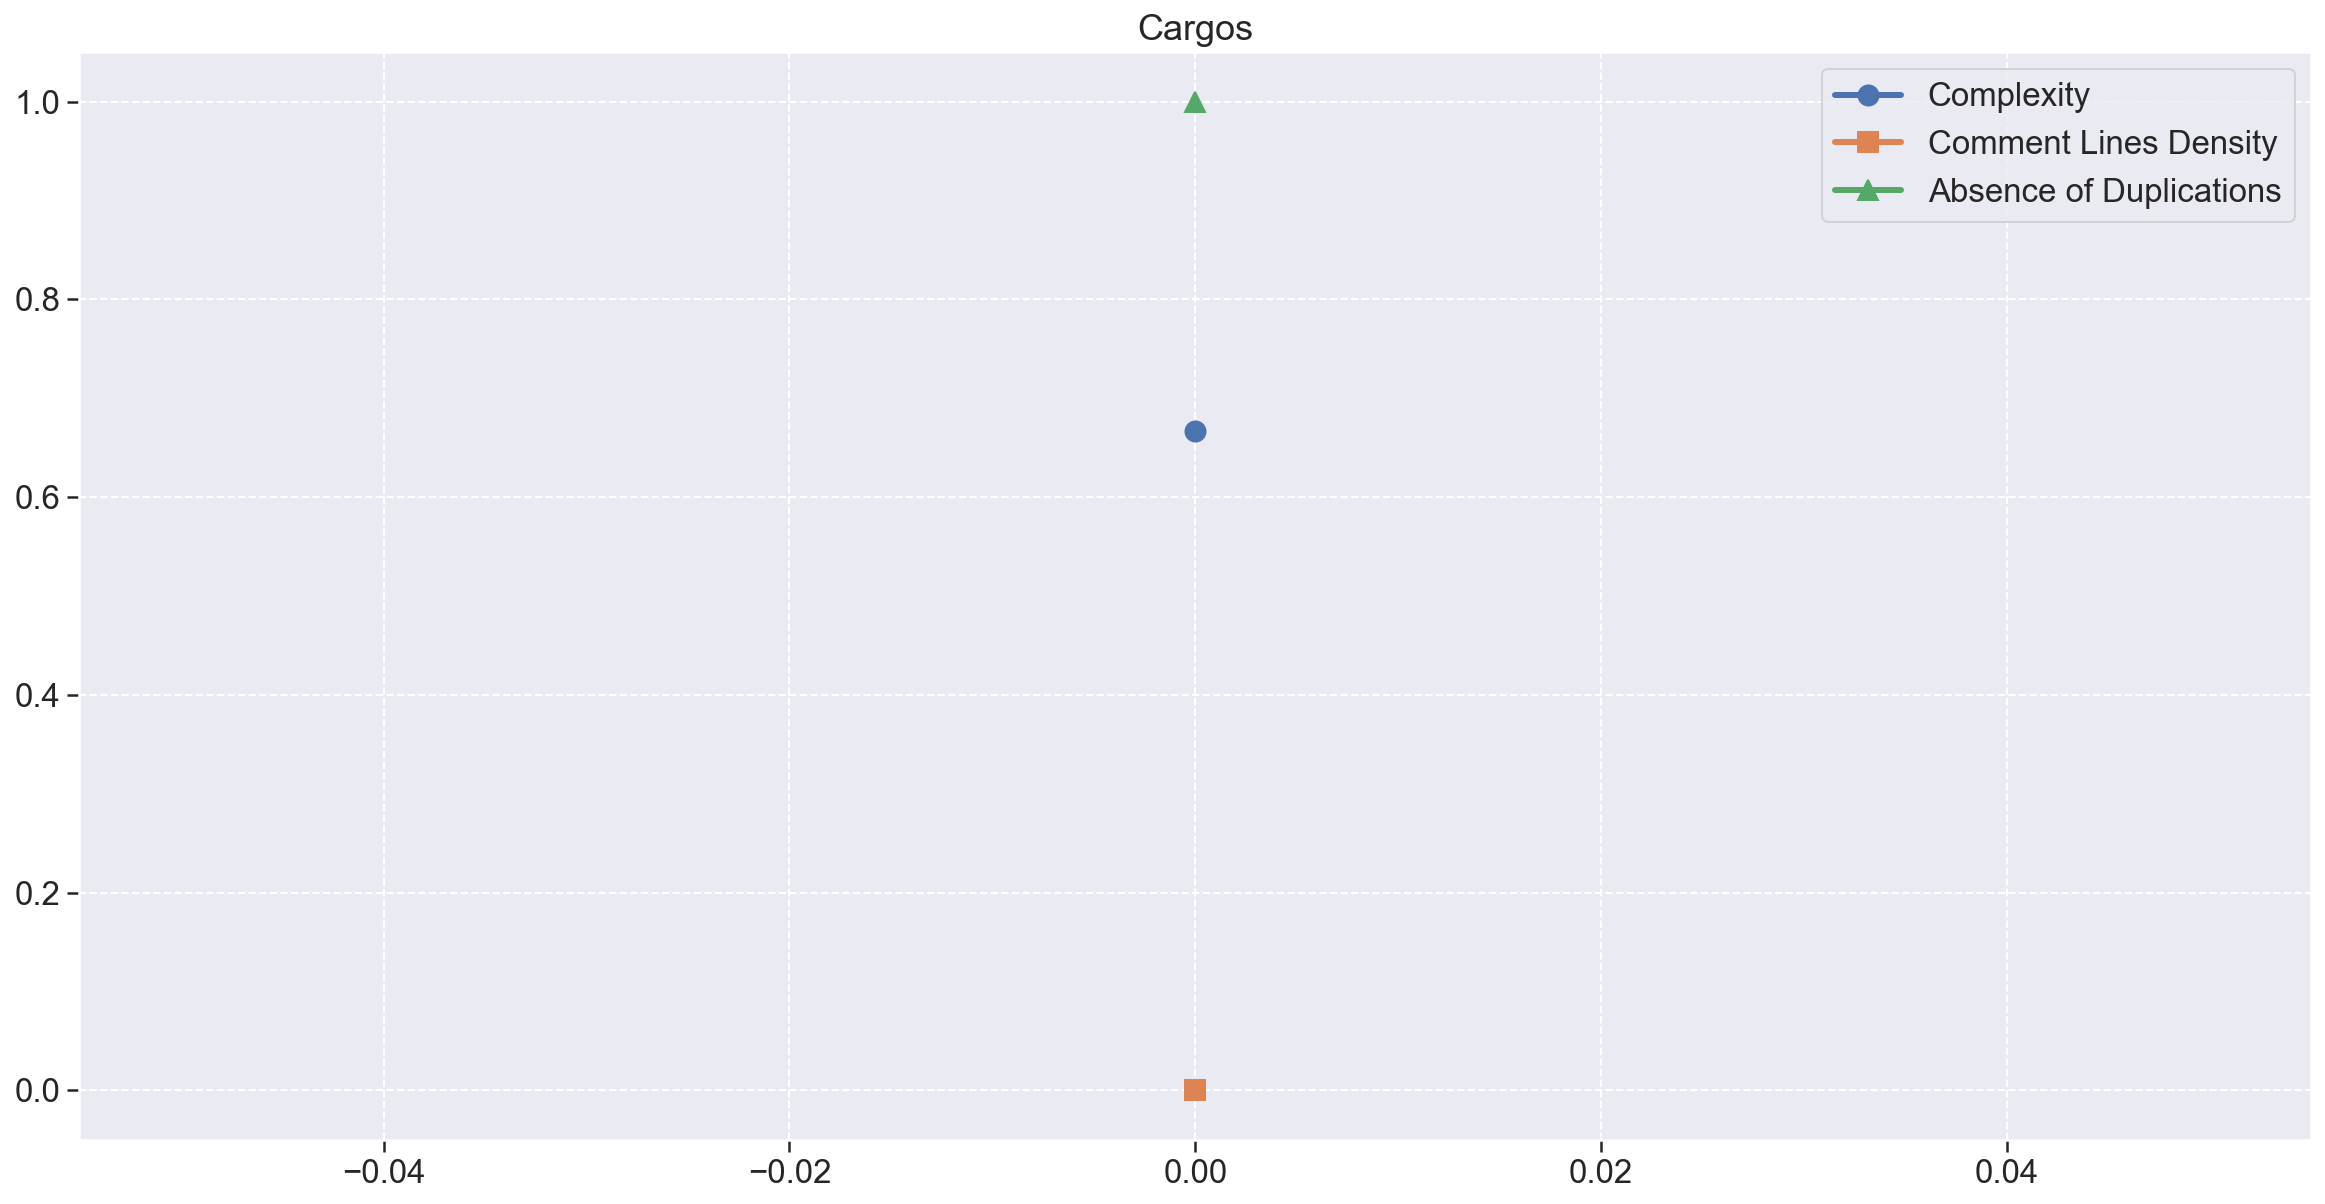

In [32]:
fig = plt.figure(figsize=(20, 10))

plt.title('Cargos')
plt.plot(repos_metrics_list[4]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[4]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[4]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

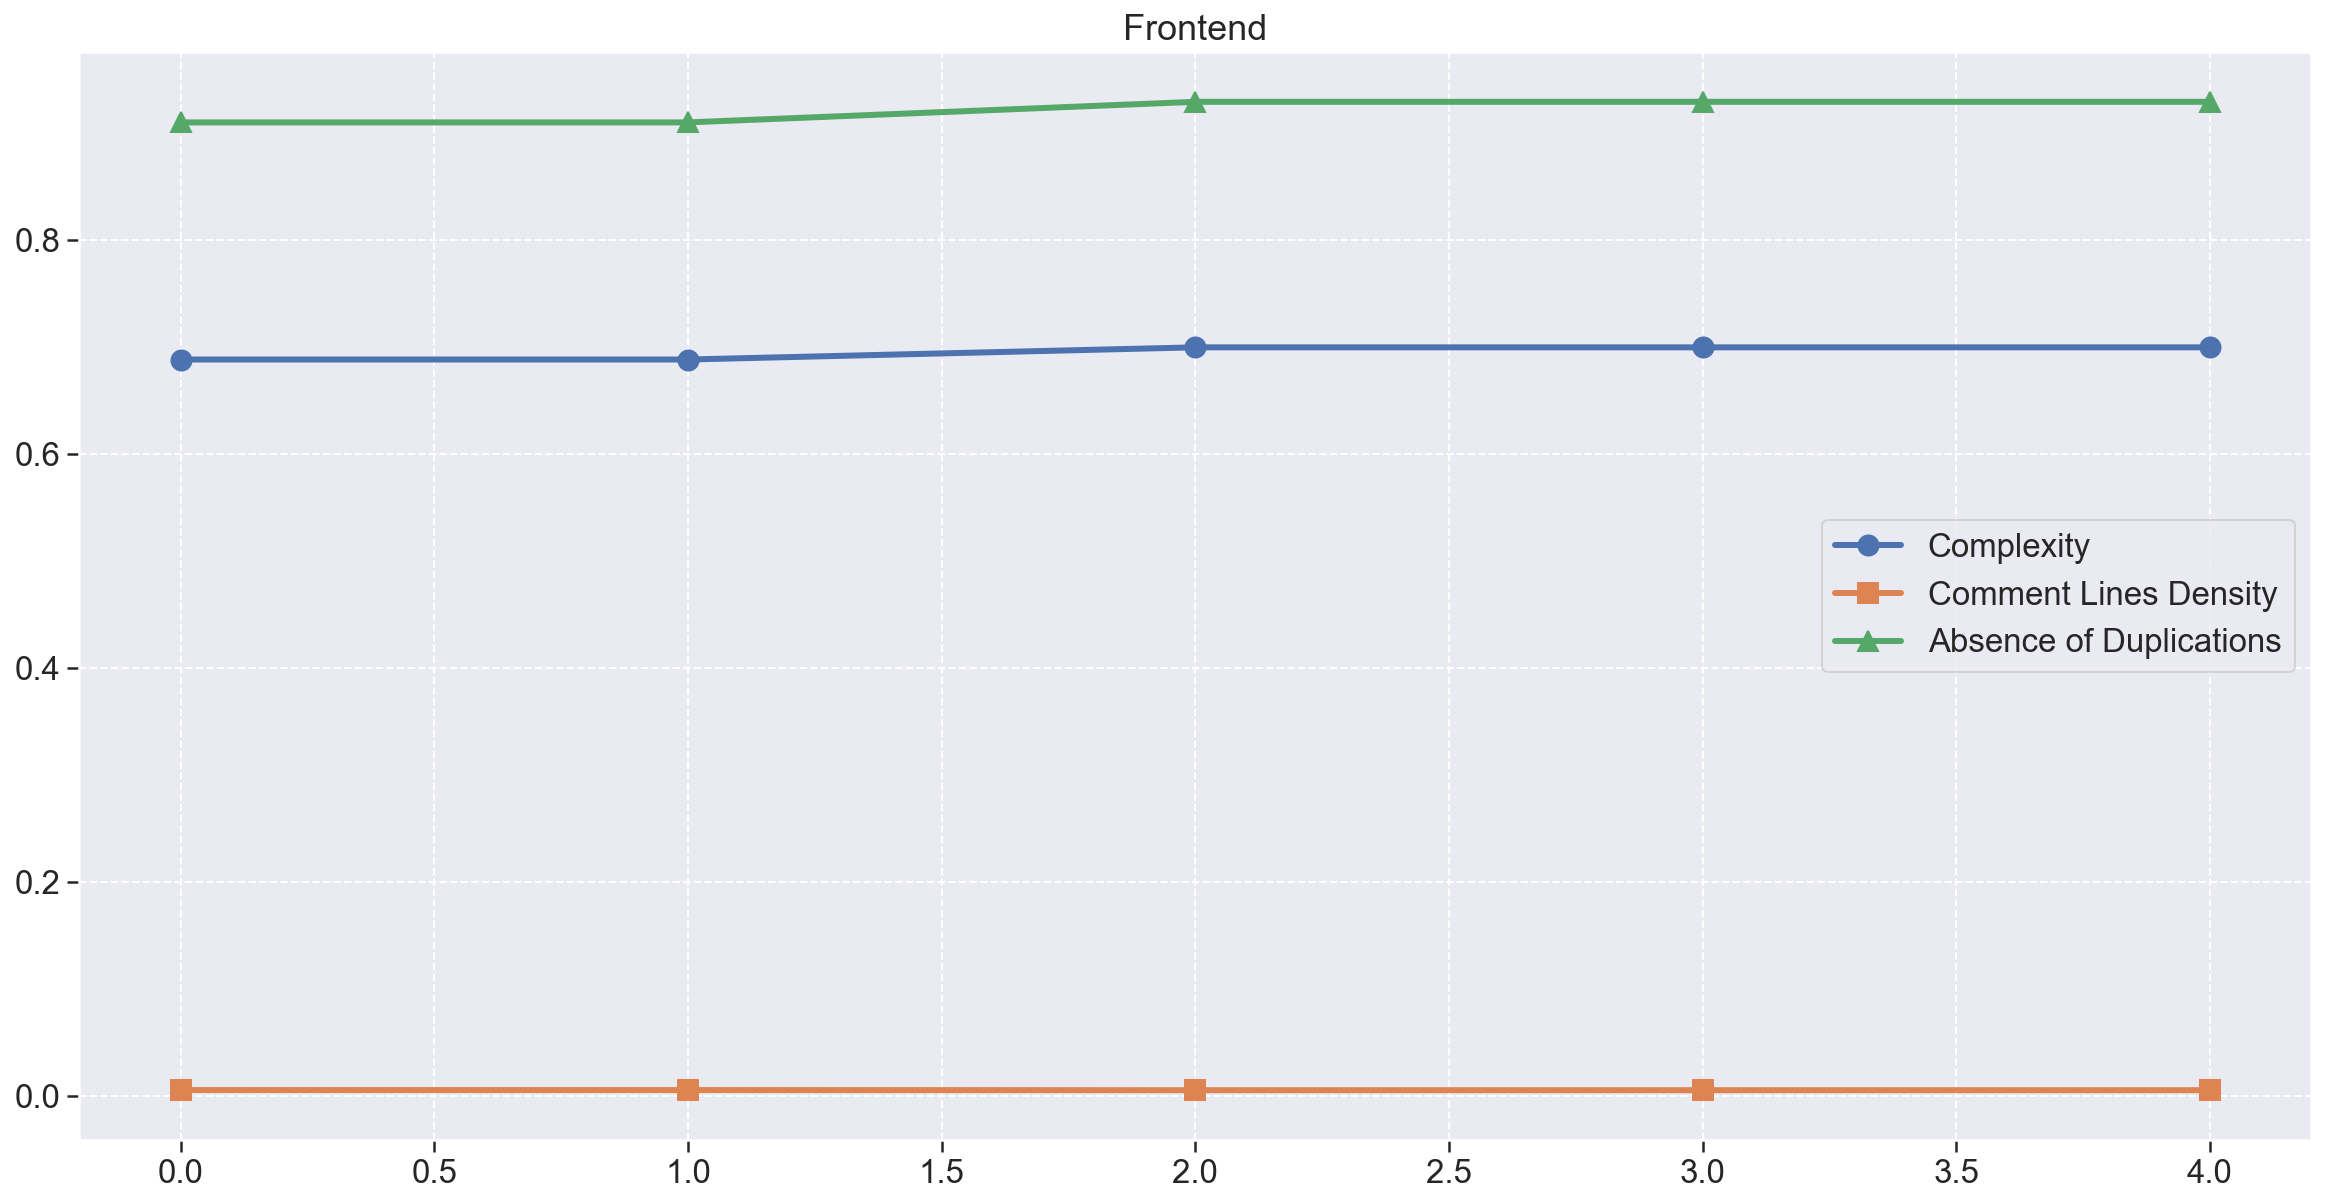

In [33]:
fig = plt.figure(figsize=(20, 10))

plt.title('Frontend')
plt.plot(repos_metrics_list[5]['em1'], linewidth=3, marker='o', label='Complexity', markersize=10)
plt.plot(repos_metrics_list[5]['em2'], linewidth=3, marker='s', label='Comment Lines Density', markersize=10)
plt.plot(repos_metrics_list[5]['em3'], linewidth=3, marker='^', label='Absence of Duplications', markersize=10)

plt.legend()

##### Setting measures weights

In [34]:
wem1=wem2=wem3 = 0.3374
SC_Modifiability_EM_Weights = np.array([wem1, wem2, wem3])

### Computing overall quality of each microsservice

In [35]:
def create_sc_tensor(measures_list, size_z):

    tensor_sc_measures = ts.tensor(measures_list).reshape((measures_list.shape[0],measures_list.shape[1],size_z))

    return tensor_sc_measures

repos_sc_measures_list = []

for repo_measures in repos_metrics_list:
    repos_sc_measures_list.append(np.array([repo_measures['em1'].astype(float),
                                            repo_measures['em2'].astype(float),
                                            repo_measures['em3'].astype(float)]))

t_sc_modifiability_tensor_list = []

t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[0], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[1], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[2], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[3], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[4], 1))
t_sc_modifiability_tensor_list.append(create_sc_tensor(repos_sc_measures_list[5], 1))

print("Modifiability Tensor dimensions = " + str(t_sc_modifiability_tensor_list[0].ndim))

t_sc_modifiability_tensor_list[0]

Modifiability Tensor dimensions = 3


array([[[0.625]],

       [[0.   ]],

       [[1.   ]]])

In [36]:
t_sc_modifiability_weighted_list = []

for i in range(len(t_sc_modifiability_tensor_list)):

    t_sc_modifiability_weighted = np.empty(t_sc_modifiability_tensor_list[i].shape)

    # t_sc_modifiability_frontend[:, :, 0][j] = Slice in a specific dimension and multiply by respective weight
    for j in range(t_sc_modifiability_tensor_list[i].ndim):
        t_sc_modifiability_weighted[:, :, 0][j] = np.tensordot(t_sc_modifiability_tensor_list[i][:,:,0][j],
                                                               SC_Modifiability_EM_Weights[j], 0)
    t_sc_modifiability_weighted_list.append(t_sc_modifiability_weighted)

t_sc_modifiability_weighted_list[0]

array([[[0.210875]],

       [[0.      ]],

       [[0.3374  ]]])

In [37]:
wsc1 = 1

t_sc_modifiability_agregated_list = []

for i in range(len(t_sc_modifiability_weighted_list)):

    #t_sc_modifiability_agregated = np.empty(t_sc_modifiability_weighted_list[i].shape)
    t_sc_modifiability_agregated = np.empty([t_sc_modifiability_weighted_list[i].shape[1]])

    for j in range(t_sc_modifiability_weighted_list[i].shape[1]):
        t_sc_modifiability_agregated[j] = np.linalg.norm(t_sc_modifiability_weighted_list[i][:,:,0][:,j])

    t_sc_modifiability_agregated_list.append(np.tensordot(t_sc_modifiability_agregated, wsc1, 0))

t_sc_modifiability_agregated_list[0]

array([0.39787815])

In [38]:
wc1 = 1

t_c_maintainability_agregated_list = []

for i in range(len(t_sc_modifiability_agregated_list)):

    t_c_maintainability_agregated = np.empty([t_sc_modifiability_agregated_list[i].shape[0]])

    for j in range(t_sc_modifiability_agregated_list[i].shape[0]):
        t_c_maintainability_agregated[j] = np.linalg.norm(t_sc_modifiability_weighted_list[i][:,:,0][:,j])

    t_c_maintainability_agregated_list.append(np.tensordot(t_c_maintainability_agregated, wc1, 0))

t_c_maintainability_agregated_list[0]

array([0.39787815])

In [39]:
for i in range(len(repos_metrics_list)):
    repos_metrics_list[i]['Modifiability'] = t_c_maintainability_agregated_list[i].tolist()
    repos_metrics_list[i]['Maintainability'] = t_c_maintainability_agregated_list[i].tolist()
    repos_metrics_list[i]['SQC'] = t_c_maintainability_agregated_list[i].tolist()


column_names = ["em1", "em2", "em3", "repository", "version", "Modifiability", "Maintainability", "SQC" ]

#for i in range(len(repos_metrics_list)):
#    repos_metrics_list[i] = repos_metrics_list[i].reindex(columns=column_names)

#repos_metrics_list.reindex(columns=column_names)

repos_metrics_list[0]

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.625,0.0,1.0,2021-2-SiGeD-Users,2022-03-18,0.397878,0.397878,0.397878


## Plotting the total quality(SQC) from all SiGeD microservices

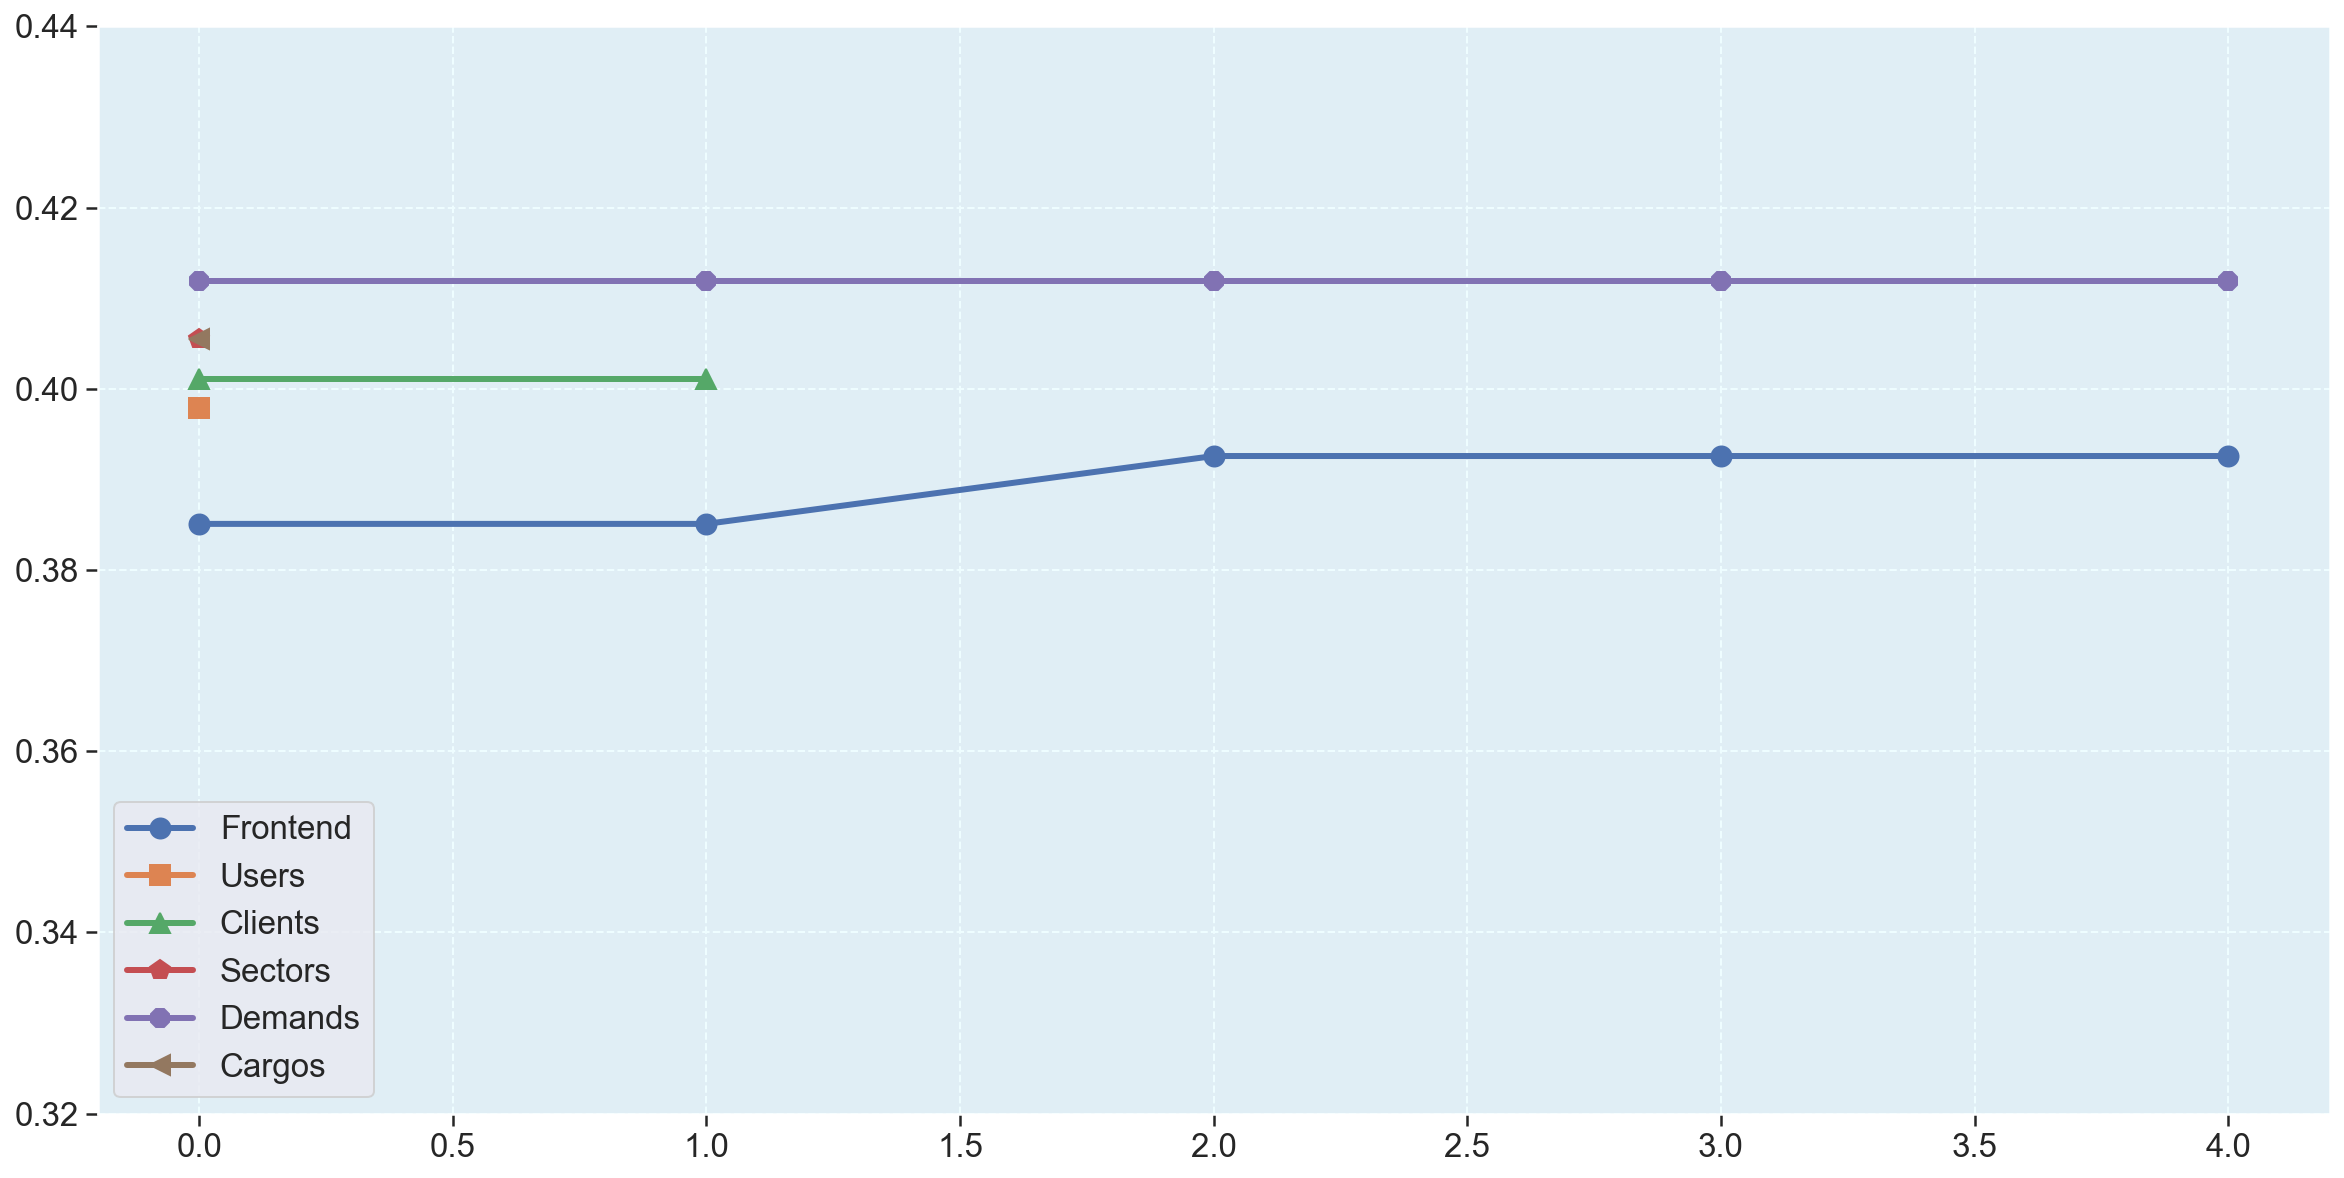

In [40]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["2021-2-SiGeD-Frontend"]['SQC'], linewidth=3, marker='o', label="Frontend", markersize=10)
plt.plot(repository_metrics["2021-2-SiGeD-Users"]['SQC'], linewidth=3, marker='s', label="Users", markersize=10)
plt.plot(repository_metrics["2021-2-SiGeD-Clients"]['SQC'], linewidth=3, marker='^', label="Clients", markersize=10)
plt.plot(repository_metrics["2021-2-SiGeD-Sectors"]['SQC'], linewidth=3, marker='p', label="Sectors", markersize=10)
plt.plot(repository_metrics["2021-2-SiGeD-Demands"]['SQC'], linewidth=3, marker='8', label="Demands", markersize=10)
plt.plot(repository_metrics["2021-2-SiGeD-Cargos"]['SQC'], linewidth=3, marker='<', label="Cargos", markersize=10)


# Background color
plt.axhspan(.32,.44, color="#c9f9ff", alpha=0.3)

plt.ylim(.32,.44)

plt.legend()

## Plotting the dataset with SiGeD's calculations

In [41]:
metrics_df = pd.concat([repository_metrics["2021-2-SiGeD-Frontend"],
                        repository_metrics["2021-2-SiGeD-Users"],
                        repository_metrics["2021-2-SiGeD-Clients"],
                        repository_metrics["2021-2-SiGeD-Demands"],
                        repository_metrics["2021-2-SiGeD-Sectors"],
                        repository_metrics["2021-2-SiGeD-Cargos"],], ignore_index=True)

metrics_df

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-15,0.385089,0.385089,0.385089
1,0.688623,0.005988,0.910180,2021-2-SiGeD-Frontend,2022-03-16,0.385089,0.385089,0.385089
2,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-19,0.392581,0.392581,0.392581
3,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-03-30,0.392581,0.392581,0.392581
4,0.700000,0.005882,0.929412,2021-2-SiGeD-Frontend,2022-04-04,0.392581,0.392581,0.392581
5,0.625000,0.000000,1.000000,2021-2-SiGeD-Users,2022-03-18,0.397878,0.397878,0.397878
6,0.642857,0.000000,1.000000,2021-2-SiGeD-Clients,2022-03-16,0.401104,0.401104,0.401104
7,0.642857,0.000000,1.000000,2021-2-SiGeD-Clients,2022-03-18,0.401104,0.401104,0.401104
8,0.700000,0.000000,1.000000,2021-2-SiGeD-Demands,2022-03-03,0.411849,0.411849,0.411849
9,0.700000,0.000000,1.000000,2021-2-SiGeD-Demands,2022-03-16,0.411849,0.411849,0.411849


### Generating dataset in .CSV format

In [42]:
metrics_df.to_excel('data/fga-eps-mds-2021-2-SiGeD-DATASET-23-03-2021-24-05-2021-excel.xlsx', header=False, index = False)
metrics_df.to_csv('data/fga-eps-mds-2021-2-SiGeD-DATASET-23-03-2021-24-05-2021-csv.csv', header=False, index = False)
#metrics_df.to_json('data/metrics_df_json.json', index = False)

In [43]:
qrapids_df = pd.read_csv('data/fga-eps-mds-2021-2-SiGeD-DATASET-23-03-2021-24-05-2021-csv.csv', sep=',', header=None,
                              names=['m1', 'm2', 'm3', 'repository', 'version', 'asc1', 'ac1','total'], dtype='a')

qrapids_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.688622754491018,0.005988023952095809,0.9101796407185628,2021-2-SiGeD-Frontend,2022-03-15,0.38508917094072953,0.38508917094072953,0.38508917094072953
1,0.688622754491018,0.005988023952095809,0.9101796407185628,2021-2-SiGeD-Frontend,2022-03-16,0.38508917094072953,0.38508917094072953,0.38508917094072953
2,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-03-19,0.3925806431496318,0.3925806431496318,0.3925806431496318
3,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-03-30,0.3925806431496318,0.3925806431496318,0.3925806431496318
4,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-04-04,0.3925806431496318,0.3925806431496318,0.3925806431496318
5,0.625,0.0,1.0,2021-2-SiGeD-Users,2022-03-18,0.39787815424448725,0.39787815424448725,0.39787815424448725
6,0.6428571428571429,0.0,1.0,2021-2-SiGeD-Clients,2022-03-16,0.401103939147947,0.401103939147947,0.401103939147947
7,0.6428571428571429,0.0,1.0,2021-2-SiGeD-Clients,2022-03-18,0.401103939147947,0.401103939147947,0.401103939147947
8,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-03,0.4118491864748551,0.4118491864748551,0.4118491864748551
9,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-16,0.4118491864748551,0.4118491864748551,0.4118491864748551


In [44]:
siged_df = pd.read_csv('data/fga-eps-mds-2021-2-SiGeD-DATASET-23-03-2021-24-05-2021-csv.csv', sep=',',
                                 header=None, names=column_names, dtype='a')

siged_df

,em1,em2,em3,repository,version,Modifiability,Maintainability,SQC
0,0.688622754491018,0.005988023952095809,0.9101796407185628,2021-2-SiGeD-Frontend,2022-03-15,0.38508917094072953,0.38508917094072953,0.38508917094072953
1,0.688622754491018,0.005988023952095809,0.9101796407185628,2021-2-SiGeD-Frontend,2022-03-16,0.38508917094072953,0.38508917094072953,0.38508917094072953
2,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-03-19,0.3925806431496318,0.3925806431496318,0.3925806431496318
3,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-03-30,0.3925806431496318,0.3925806431496318,0.3925806431496318
4,0.7,0.0058823529411764705,0.9294117647058824,2021-2-SiGeD-Frontend,2022-04-04,0.3925806431496318,0.3925806431496318,0.3925806431496318
5,0.625,0.0,1.0,2021-2-SiGeD-Users,2022-03-18,0.39787815424448725,0.39787815424448725,0.39787815424448725
6,0.6428571428571429,0.0,1.0,2021-2-SiGeD-Clients,2022-03-16,0.401103939147947,0.401103939147947,0.401103939147947
7,0.6428571428571429,0.0,1.0,2021-2-SiGeD-Clients,2022-03-18,0.401103939147947,0.401103939147947,0.401103939147947
8,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-03,0.4118491864748551,0.4118491864748551,0.4118491864748551
9,0.7,0.0,1.0,2021-2-SiGeD-Demands,2022-03-16,0.4118491864748551,0.4118491864748551,0.4118491864748551
